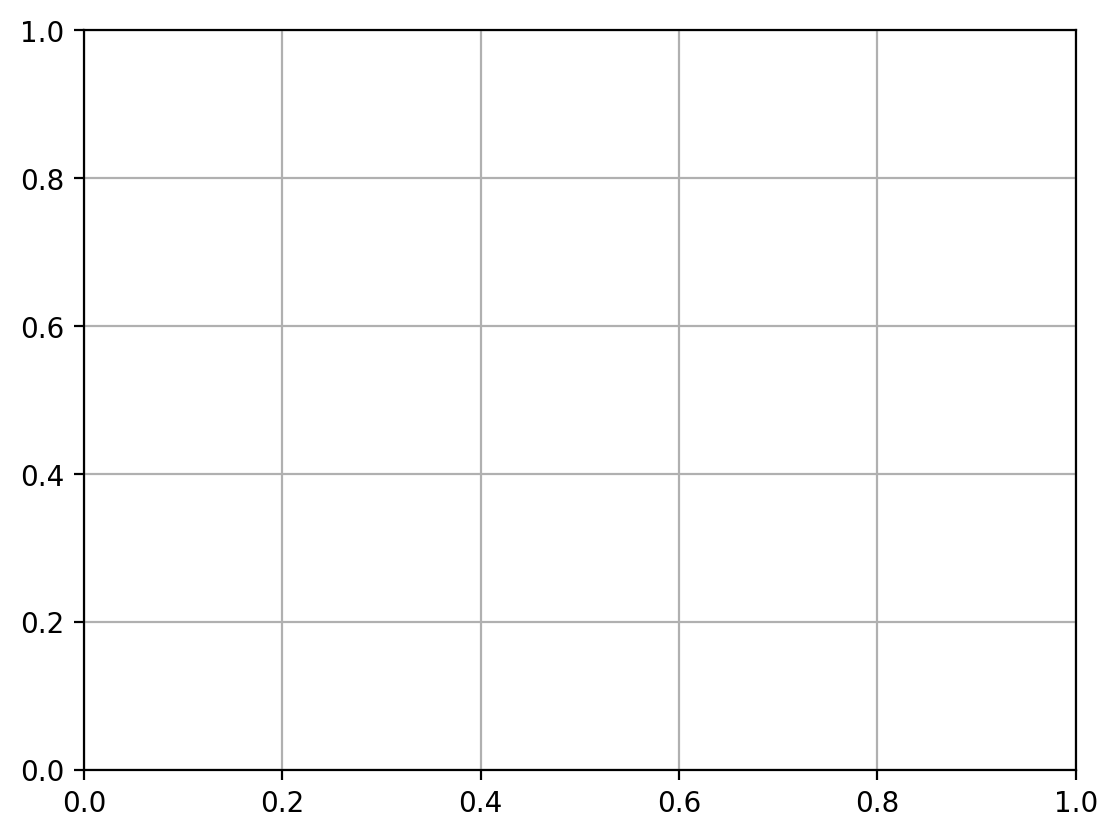

In [6]:
"""Imports"""
from calendar import month
from ctypes import c_ulong
import pandas as pd
import numpy as np
import re
import chainladder as cl
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import ipywidgets as widgets
from dateutil import relativedelta as rd
import datetime
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import sqlite3
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')
plt.grid(None)
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import r2_score
from sqlalchemy import create_engine

In [23]:
# """"connect tyo SQL Server"""

# server = 'arm-sql1.database.windows.net'
# database = 'Unified' 
# username = 'joranias' 
# password = 'dataread!!!@12'

# # Connection string
# connection_string = (
#     f'mssql+pyodbc://{username}:{password}@{server}/{database}'
#     f'?driver=ODBC+Driver+17+for+SQL+Server'
# )

# # Create an engine and connect
# engine = create_engine(connection_string)

# try:
#     with engine.connect() as connection:
#         print("Connection successful!")
# except Exception as e:
#     print(f"Error: {e}")


ModuleNotFoundError: No module named 'pyodbc'

In [7]:
# Ruta de la base

df = pd.read_excel('Input Database_Unified.xlsx',sheet_name='Payments')
df

,check_number,claim_occurrence_span_start,check_date,check_amount_total,company_code,block_code,PLOB,LOB,State
0,1000163213,2019-01-03,2019-01-20,176.86,NaN,NaN,NaN,NaN,NaN
1,1000163182,2019-01-06,2019-01-20,84.95,NaN,NaN,NaN,NaN,NaN
2,1000163252,2019-01-10,2019-01-22,73.81,NaN,NaN,NaN,NaN,NaN
3,1000163387,2019-01-03,2019-01-27,19.40,NaN,NaN,NaN,NaN,NaN
4,1000163482,2019-01-08,2019-01-29,177.24,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18381,DUMMY,2024-02-01,2024-02-01,0.00,NaN,NaN,NaN,NaN,NaN
18382,1000188311,2024-01-30,2024-03-17,8.73,NaN,NaN,NaN,NaN,NaN
18383,1000188310,2024-02-01,2024-03-17,14065.00,NaN,NaN,NaN,NaN,NaN
18384,1000188313,2023-11-26,2024-03-28,1600.00,NaN,NaN,NaN,NaN,NaN


In [8]:
#Inputs in FrontEnd
InputOrigin='claim_occurrence_span_start'
InputDevelopment='check_date'
InputColumns='check_amount_total'
InputCumulative=False
#InputCompany="company_code"
#InputBlock="block_code"
#InputPLOB="PLOB"
#InputLOB="LOB"
#InputState="State"

we = cl.Triangle(
    df,
    origin=InputOrigin,
    development=InputDevelopment,
    columns=InputColumns,
    #index=[InputCompany,InputBlock,InputPLOB, InputLOB, InputState],
    cumulative=InputCumulative
)
we

,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
2019-01,"6,171","24,270","7,079","1,809","19,181","5,379","1,385",532,66,106,...,,,,,,,,,,
2019-02,"1,832","19,463","10,014","16,281","1,583","1,393","1,372",97,,12,...,,,,,,,,,,
2019-03,"3,851","21,533","16,630","4,987",92,301,"1,403",79,16,32,...,,,,,,,,,,
2019-04,"2,031","14,921","14,958","4,012",201,540,74,24,70,,...,,,,,,,,,,
2019-05,"2,124","25,302","6,514","2,529",202,"1,613","1,416",207,35,10,...,,,,,,,,,,
2019-06,"4,619","31,841","2,368","2,498","1,683","1,423",9,62,,2,...,,,,,,,,,,
2019-07,"2,955","19,689","7,362",624,"4,155",75,"1,263",2,"1,382",25,...,,,,,,,,,,
2019-08,"2,212","14,020","9,425","1,611",196,"1,468",98,"1,401",59,,...,,,,,,,,,,
2019-09,"2,019","18,474","5,952","1,527",240,125,"1,496",28,,"1,425",...,,,,,,,,,,
2019-10,"1,678","13,810","7,687","1,930",513,"2,619",71,"1,500",40,"4,278",...,,,,,,,,,,


In [19]:

"""set the cumulative 24 months triangle"""
ValuationDate= datetime.date(2024,3,1)
InitialDate= f'{ValuationDate.year-2}-{ValuationDate.month}-{ValuationDate.day}'

triangle=we[we.origin>InitialDate][we.development<25]
triangle_cum=triangle.incr_to_cum()
triangle_cum_df=triangle_cum.to_frame()

#



In [10]:
"""Link-Ratios - Generic"""
triangle_factors = triangle_cum.link_ratio
triangle_factors_df=triangle_factors.to_frame()

In [25]:
"""Different Averages for Graph"""
VolumeAll=cl.Development(average='volume',n_periods=24)
transformed_triangleVolumeAll = VolumeAll.fit_transform(triangle_cum)
ldfVolumeAll=transformed_triangleVolumeAll.ldf_
cdfVolumeAll=transformed_triangleVolumeAll.cdf_
cdfVolumeAll_df=(1/cdfVolumeAll).T

Volume12=cl.Development(average='volume',n_periods=12)
transformed_triangleVolume12 = Volume12.fit_transform(triangle_cum)
ldfVolume12=transformed_triangleVolume12.ldf_
cdfVolume12=transformed_triangleVolume12.cdf_
cdfVolume12_df=(1/cdfVolume12).T

Volume6=cl.Development(average='volume',n_periods=6)
transformed_triangleVolume6 = Volume6.fit_transform(triangle_cum)
ldfVolume6=transformed_triangleVolume6.ldf_
cdfVolume6=transformed_triangleVolume6.cdf_
cdfVolume6_df=(1/cdfVolume6).T

Volume3=cl.Development(average='volume',n_periods=3)
transformed_triangleVolume3 = Volume3.fit_transform(triangle_cum)
ldfVolume3=transformed_triangleVolume3.ldf_
cdfVolume3=transformed_triangleVolume3.cdf_
cdfVolume3_df=(1/cdfVolume3).to_frame()

SimpleAll=cl.Development(average='simple',n_periods=24)
transformed_triangleSimpleAll= SimpleAll.fit_transform(triangle_cum)
ldfldfSimpleAll=transformed_triangleSimpleAll.ldf_
cdfSimpleAll=transformed_triangleSimpleAll.cdf_
cdfSimpleAll_df=(1/cdfSimpleAll).T

Simple12=cl.Development(average='simple',n_periods=12)
transformed_triangleSimple12 = Simple12.fit_transform(triangle_cum)
ldfSimple12=transformed_triangleSimple12.ldf_
cdfSimple12=transformed_triangleSimple12.cdf_
cdfSimple12_df=(1/cdfSimple12).T


Simple6=cl.Development(average='simple',n_periods=6)
transformed_triangleSimple6 = Simple6.fit_transform(triangle_cum)
ldfSimple6=transformed_triangleSimple6.ldf_
cdfSimple6=transformed_triangleSimple6.cdf_
cdfSimple6_df=(1/cdfSimple6).T

Simple3=cl.Development(average='simple',n_periods=3)
transformed_triangleSimple3 = Simple3.fit_transform(triangle_cum)
ldfSimple3=transformed_triangleSimple3.ldf_
cdfSimple3=transformed_triangleSimple3.cdf_
cdfSimple3_df=(1/cdfSimple3).T

#Inputs for mannual selection. See a way to automate the lenght of the vector
Input1=1
Input2=1
Input3=1
Input4=1
Input5=1
Input6=1
Input7=1
Input8=1
Input9=1
Input10=1
Input11=1
Input12=1
Input13=1
Input14=1
Input15=1
Input16=1
Input17=1
Input18=1
Input19=1
Input20=1
Input21=1
Input22=1
Input23=1


MannualPatterns={1:Input1, 2: Input2, 3:Input3, 4:Input4, 5:Input5, 6:Input6, 7:Input7, 8:Input8, 9:Input9, 10:Input10, 11:Input11,12:Input12, 13:Input13, 14:Input14, 15:Input15, 16:Input16
                 , 17:Input17, 18:Input18, 19:Input19, 20:Input20, 21:Input21, 22:Input22, 23:Input23}
MannualAverage=cl.DevelopmentConstant(patterns=MannualPatterns,style='ldf').fit(triangle_cum).ldf_
MannualAverage

#till working on how to select between different averages. This one should be de selection with the combination the actuary wants to select
ldfInitialSelected=(ldfSimple6+ldfSimple3)/2
cdfInitialSelected=(cdfSimple6+cdfSimple3)/2


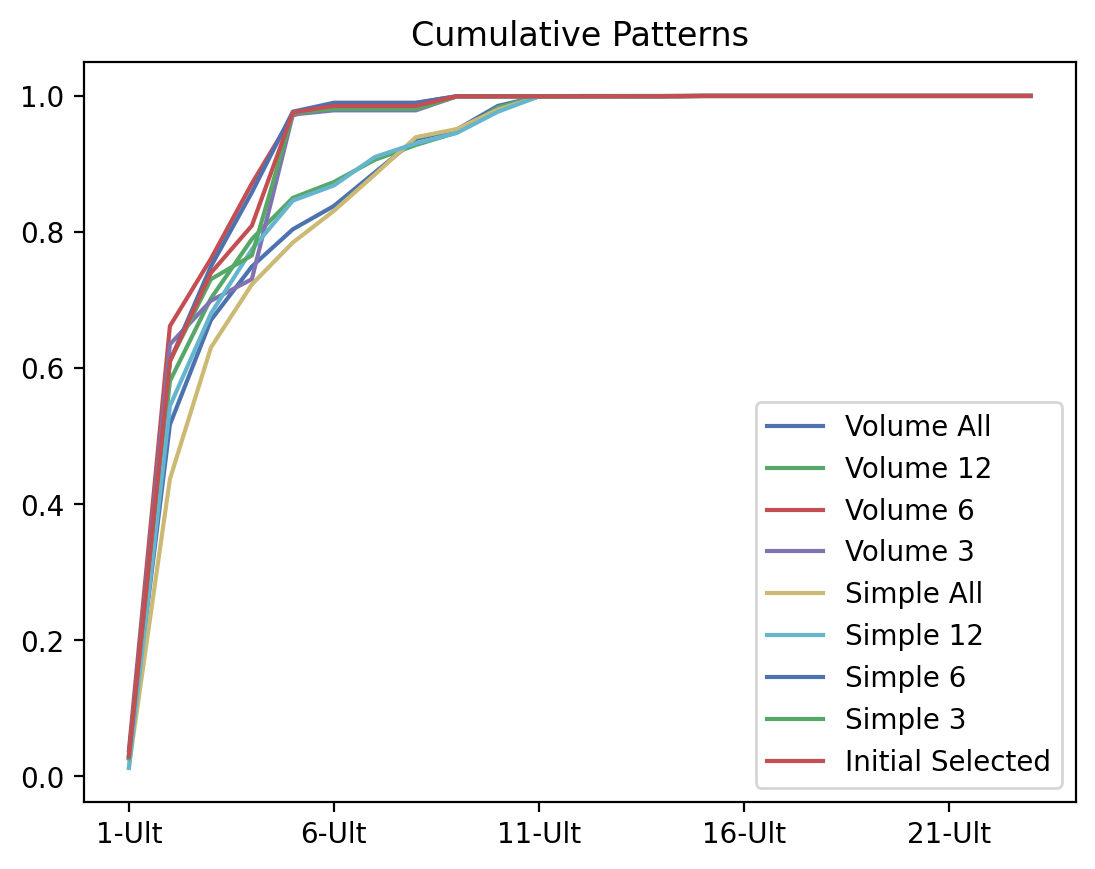

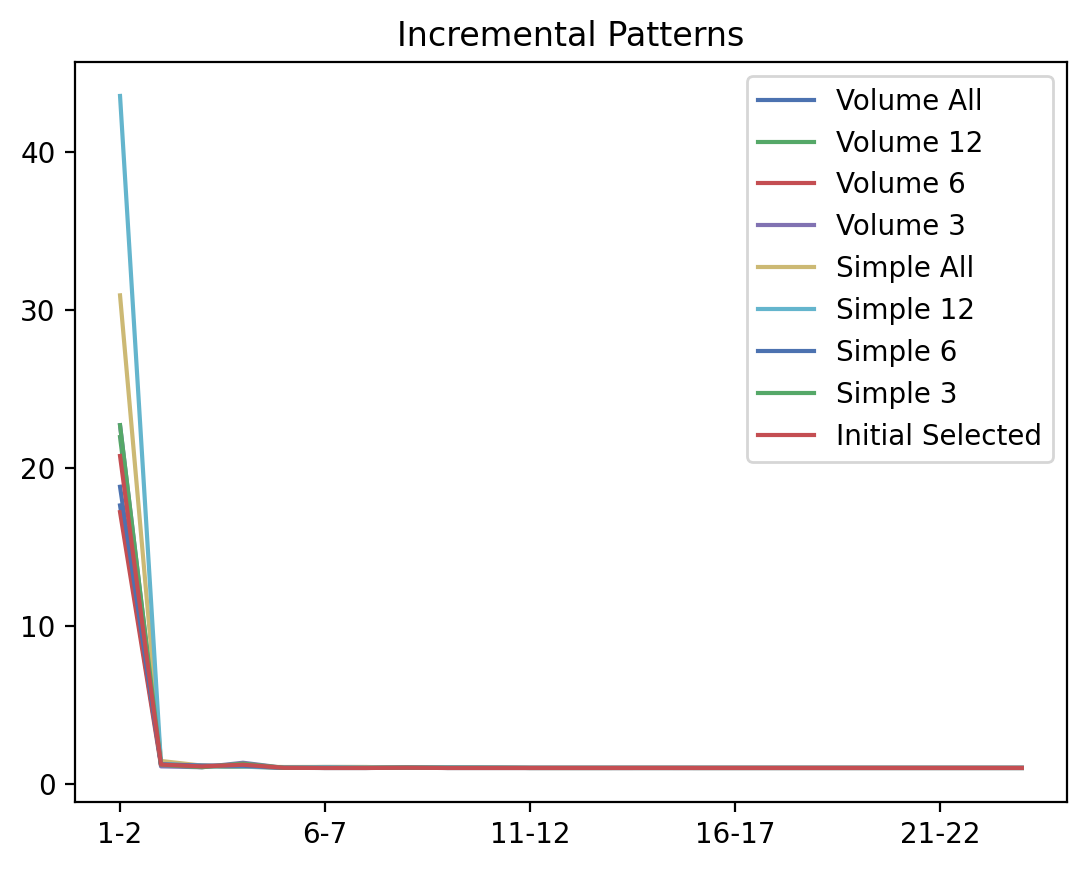

In [12]:
"""Culative Patterns Plot"""
plotPatterns=pd.concat([(1/transformed_triangleVolumeAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(1/transformed_triangleVolume12.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 12'}),(1/transformed_triangleVolume6.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 6'}),(1/transformed_triangleVolume3.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 3'}),(1/transformed_triangleSimpleAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}), (1/transformed_triangleSimple12.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 12'}),(1/transformed_triangleSimple6.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 6'}),(1/transformed_triangleSimple3.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 3'}),(1/cdfInitialSelected).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Cumulative Patterns")

"""Incremental Patterns Plot"""
plotPatterns=pd.concat([(transformed_triangleVolumeAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(transformed_triangleVolume12.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 12'}),(transformed_triangleVolume6.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 6'}),(transformed_triangleVolume3.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 3'}),(transformed_triangleSimpleAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}),(transformed_triangleSimple12.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 12'}),(transformed_triangleSimple6.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 6'}),(transformed_triangleSimple3.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 3'}),(ldfInitialSelected).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Incremental Patterns")



In [13]:
"""Read Premium Data"""
pf=pd.read_excel('Input Database_Unified.xlsx',sheet_name='Premium')

pf

,claim_occurrence_span_start,check_date,Annualized Premium,company_code,block_code,PLOB,LOB,State
0,2019-01-01,2024-03-01,52803.717500,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,2024-03-01,51256.242500,NaN,NaN,NaN,NaN,NaN
2,2019-03-01,2024-03-01,49140.509167,NaN,NaN,NaN,NaN,NaN
3,2019-04-01,2024-03-01,48238.895833,NaN,NaN,NaN,NaN,NaN
4,2019-05-01,2024-03-01,47716.725833,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58,2023-11-01,2024-03-01,12565.323333,NaN,NaN,NaN,NaN,NaN
59,2023-12-01,2024-03-01,12122.973333,NaN,NaN,NaN,NaN,NaN
60,2024-01-01,2024-03-01,11200.785000,NaN,NaN,NaN,NaN,NaN
61,2024-02-01,2024-03-01,11200.785000,NaN,NaN,NaN,NaN,NaN


In [14]:
#Inputs in FrontEnd
InputOriginP='claim_occurrence_span_start'
InputDevelopmentP='check_date'
InputColumnsP='Annualized Premium'
InputCumulativeP=True
#InputCompanyP="company_code"
#InputBlockP="block_code"
#InputPLOBP="PLOB"
#InputLOBP="LOB"
#InputStateP="State"

wep = cl.Triangle(
    pf,
    origin=InputOriginP,
    development=InputDevelopmentP,
    columns=InputColumnsP,
    #index=[InputCompanyP,InputBlockP,InputPLOBP, InputLOBP, InputStateP],
    cumulative=InputCumulativeP
)
wep


,2024-03
2019-01,"52,804"
2019-02,"51,256"
2019-03,"49,141"
2019-04,"48,239"
2019-05,"47,717"
2019-06,"47,813"
2019-07,"46,336"
2019-08,"45,266"
2019-09,"43,668"
2019-10,"42,612"


In [15]:
"""Create 234 months premium data"""
ValuationDate= datetime.date(2024,3,1)
InitialDate= f'{ValuationDate.year-2}-{ValuationDate.month}-{ValuationDate.day}'

EarnedPremium=wep[wep.origin>InitialDate]
EarnedPremiumm=EarnedPremium.incr_to_cum()
EarnedPremium_df=EarnedPremium.to_frame()

EarnedPremium.to_csv('EarnedPremium.csv')


In [16]:
"""Read Last Month Annualized premium"""

mpf=pd.read_excel('Input Database_Unified.xlsx',sheet_name='LastMonthPremium')

mpf_filtered=mpf[(mpf.PLOB==20) & ((mpf.Policy_Status==20)|(mpf.Policy_Status==30)|(mpf.Policy_Status==33))]

Premium_NFU_31= sum(mpf_filtered[(mpf_filtered.LOB==31)&(mpf_filtered.Block_Code=="NFU")].Annualized_Premium)
Premium_NFU_32= sum(mpf_filtered[(mpf_filtered.LOB==32)&(mpf_filtered.Block_Code=="NFU")].Annualized_Premium)
Premium_NFL_31= sum(mpf_filtered[(mpf_filtered.LOB==31)&(mpf_filtered.Block_Code=="NFL")].Annualized_Premium)
Premium_NFL_32= sum(mpf_filtered[(mpf_filtered.LOB==32)&(mpf_filtered.Block_Code=="NFL")].Annualized_Premium)
Premium_AFL_31= sum(mpf_filtered[(mpf_filtered.LOB==31)&(mpf_filtered.Block_Code=="AFL")].Annualized_Premium)
Premium_AFL_32= sum(mpf_filtered[(mpf_filtered.LOB==32)&(mpf_filtered.Block_Code=="AFL")].Annualized_Premium)
Premium_LHP_31= sum(mpf_filtered[(mpf_filtered.LOB==31)&(mpf_filtered.Block_Code=="LHP")].Annualized_Premium)
Premium_LHP_32= sum(mpf_filtered[(mpf_filtered.LOB==32)&(mpf_filtered.Block_Code=="LHP")].Annualized_Premium)



In [17]:
"""Read Loss Ratio Input"""
lr_input=pd.read_excel('Input Database_Unified.xlsx',sheet_name='InputLossRatio')

NFL_LossRatio=lr_input[lr_input.Block_Code=='NFL']

NFL_LossRatio_list=NFL_LossRatio.LossRatio.to_frame()


In [22]:
"""Calculation of Methods"""

DFM_Method = np.dot(triangle_cum.latest_diagonal.to_frame(), [cdfInitialSelected.T]+[1])





ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [38]:
"""Update Excel Tempalte"""

workbook = openpyxl.load_workbook('Unified_IBNP_Template.xlsx')

template_link_ratios = workbook['Completion Factors']

rows_link_ratios = list(dataframe_to_rows(triangle_factors_df, index=False, header=False))
for r_idx, row in enumerate(rows_link_ratios, start=1):
    for c_idx, value in enumerate(row, start=1):
             template_link_ratios.cell(row=r_idx + 37, column=c_idx + 1, value=value)

                       
rows_cdf_Simple3=list(dataframe_to_rows(cdfSimple3_df,index=False, header=False))
for r_idx, row in enumerate(rows_cdf_Simple3,start=1):
        for c_idx, value in enumerate(row, start=1):
             template_link_ratios.cell(row=r_idx + 6, column=c_idx + 4, value=value)
          

rows_cdf_Simple6=list(dataframe_to_rows(cdfSimple6_df,index=False, header=False))
for r_idx, row in enumerate(rows_cdf_Simple6,start=1):
    for c_idx, value in enumerate(row, start=1):
             template_link_ratios.cell(row=r_idx + 6, column=c_idx + 5, value=value)


rows_cdf_Simple12=list(dataframe_to_rows(cdfSimple12_df,index=False, header=False))
for r_idx, row in enumerate(rows_cdf_Simple12,start=1):
    for c_idx, value in enumerate(row, start=1):
             template_link_ratios.cell(row=r_idx + 6, column=c_idx + 6, value=value)


template_calculation = workbook['Summary']


rows_triangle = list(dataframe_to_rows(triangle_cum_df, index=False, header=False))
for r_idx, row in enumerate(rows_triangle, start=1):
    for c_idx, value in enumerate(row, start=1):
             template_calculation.cell(row=r_idx + 7, column=c_idx + 18, value=value)

paid_cum_df=triangle_cum.latest_diagonal.to_frame()

rows_paid = list(dataframe_to_rows(paid_cum_df, index=False, header=False))
for r_idx, row in enumerate(rows_paid, start=1):
    for c_idx, value in enumerate(row, start=1):
             template_calculation.cell(row=r_idx + 7, column=c_idx + 1, value=value)

rows_premium = list(dataframe_to_rows(EarnedPremium_df, index=False, header=False))
for r_idx, row in enumerate(rows_premium, start=1):
    for c_idx, value in enumerate(row, start=1):
             template_calculation.cell(row=r_idx + 7, column=c_idx + 8, value=value)

Last_Month_Premium_31=list([Premium_NFU_31, Premium_NFL_31, Premium_AFL_31,Premium_LHP_31])
Last_Month_Premium_32=list([Premium_NFU_32, Premium_NFL_32,  Premium_AFL_32,  Premium_LHP_32])

rows_last_month_premium_31 = Last_Month_Premium_31
for r_idx in range(1,2):
    for c_idx, value in enumerate(rows_last_month_premium_31, start=1):
               template_calculation.cell(row=r_idx + 38, column=c_idx + 7, value= value)
           

rows_last_month_premium_32 = Last_Month_Premium_32
for r_idx in range(1,2):
    for c_idx, value in enumerate(rows_last_month_premium_32, start=1):
              template_calculation.cell(row=r_idx + 39, column=c_idx + 7, value= value)

rows_loss_ratio = list(dataframe_to_rows(NFL_LossRatio_list, index=False, header=False))
for r_idx, row in enumerate(rows_loss_ratio, start=1):
    for c_idx, value in enumerate(row, start=1):
             template_calculation.cell(row=r_idx + 28, column=c_idx + 9, value=value)

              
             
workbook.save('Unified_IBNP_NFL.xlsx')


